In [5]:
import geopandas
import pandas as pd
import os
import rasterio
from rasterio.plot import show
from rasterio.mask import mask
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'rasterio'

## Loading the Data

In [3]:
data_folder = "./data"
data_files = { 
    "fire_dz": "viirs-jpss1_2024_Algeria.csv",
    "fire_tn": "viirs-jpss1_2024_Tunisia.csv",
    "landcover_dz": "landcover_dz/dza_gc_adg.shp",
    "landcover_tn": "LCLU.LCTNS2022.tif",
    "climate_prec": "wc2.1_cruts4.09_5m_prec_2020-2024",
    "climate_tmax": "wc2.1_cruts4.09_5m_tmax_2020-2024",
    "climate_tmin": "wc2.1_cruts4.09_5m_tmin_2020-2024",
    "elevation": "be15_grd/be15_grd",
    "dz_boundaries": "gadm41_DZA_shp/gadm41_DZA_0.shp",
    "tn_boundaries": "gadm41_TUN_shp/gadm41_TUN_0.shp",
    "soil": "HWSD2_RASTER/HWSD2.bil"
}

output_folder = "./processed_data"
output_folders = {
    "fire": "fire_dataset",
    "landcover": "landcover_dataset",
    "climate": "climate_dataset",
    "elevation": "elevation_dataset",
    "soil": "soil_dataset"
}

### Fire Dataset

#### For Algeria

In [23]:
fire_dz_filepath = os.path.join(data_folder, data_files["fire_dz"])
fire_dz_df = pd.read_csv(fire_dz_filepath)
fire_dz_df

,latitude,longitude,bright_ti4,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_ti5,frp,daynight,type
0,27.72818,9.87200,295.51,0.76,0.77,2024-01-01,3,N20,VIIRS,n,2,277.66,1.24,N,2
1,28.63288,9.77909,301.80,0.79,0.78,2024-01-01,3,N20,VIIRS,n,2,277.05,1.57,N,2
2,28.64012,9.77953,298.65,0.79,0.78,2024-01-01,3,N20,VIIRS,n,2,277.04,1.34,N,2
3,36.74886,6.25409,338.04,0.46,0.39,2024-01-01,141,N20,VIIRS,n,2,257.28,5.21,N,2
4,35.87978,4.44782,309.49,0.41,0.37,2024-01-01,141,N20,VIIRS,n,2,272.08,1.58,N,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87441,34.86016,-1.37439,337.17,0.43,0.46,2024-12-31,1331,N20,VIIRS,n,2,287.63,3.18,D,0
87442,35.80756,-0.34148,326.23,0.50,0.49,2024-12-31,1331,N20,VIIRS,n,2,282.76,3.58,D,2
87443,36.74493,6.25849,334.95,0.60,0.71,2024-12-31,1331,N20,VIIRS,n,2,286.65,4.28,D,2
87444,36.86816,6.98849,331.50,0.66,0.73,2024-12-31,1331,N20,VIIRS,n,2,285.38,4.55,D,2


In [24]:
fire_dz_df.describe()

,latitude,longitude,bright_ti4,scan,track,acq_time,version,bright_ti5,frp,type
count,87446.000000,87446.000000,87446.000000,87446.000000,87446.000000,87446.000000,87446.0,87446.000000,87446.000000,87446.000000
mean,31.398370,6.174013,321.170189,0.476433,0.516127,379.367941,2.0,291.711062,3.454114,1.703863
std,2.642515,2.563073,18.189028,0.101948,0.126665,479.842612,0.0,11.715804,5.018793,0.723168
min,19.603230,-8.118050,240.170000,0.320000,0.360000,0.000000,2.0,244.790000,0.060000,0.000000
25%,28.735780,5.585470,305.500000,0.400000,0.400000,59.000000,2.0,282.860000,1.160000,2.000000
50%,31.403925,6.475440,316.820000,0.450000,0.500000,141.000000,2.0,290.785000,2.080000,2.000000
75%,32.515890,7.906365,337.420000,0.540000,0.620000,232.000000,2.0,298.100000,3.940000,2.000000
max,37.022990,10.993650,367.000000,0.800000,0.780000,1410.000000,2.0,350.350000,251.890000,3.000000


#### For Tunisia

In [25]:
fire_tn_filepath = os.path.join(data_folder, data_files["fire_tn"])
fire_tn_df = pd.read_csv(fire_tn_filepath)
fire_tn_df

,latitude,longitude,bright_ti4,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_ti5,frp,daynight,type
0,31.64847,9.16945,315.79,0.53,0.50,2024-01-01,142,N20,VIIRS,n,2,279.09,2.20,N,2
1,31.49290,9.48947,302.32,0.56,0.51,2024-01-01,142,N20,VIIRS,n,2,276.10,1.23,N,0
2,31.49524,9.49053,301.88,0.56,0.51,2024-01-01,142,N20,VIIRS,n,2,276.12,0.77,N,0
3,33.36728,8.54768,302.58,0.45,0.47,2024-01-01,142,N20,VIIRS,n,2,277.15,0.80,N,2
4,31.64812,9.17107,320.80,0.46,0.39,2024-01-02,124,N20,VIIRS,n,2,278.37,2.44,N,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2799,31.65023,9.17049,308.73,0.50,0.41,2024-12-30,50,N20,VIIRS,n,2,278.50,1.21,N,2
2800,31.64881,9.17031,323.63,0.61,0.53,2024-12-31,31,N20,VIIRS,n,2,279.46,2.57,N,2
2801,31.65072,9.16963,320.75,0.61,0.53,2024-12-31,31,N20,VIIRS,n,2,279.13,3.50,N,2
2802,36.59308,10.31617,296.55,0.63,0.72,2024-12-31,210,N20,VIIRS,n,2,278.94,1.12,N,2


#### Combining the Datasets

In [26]:
# We add a country column for traceability
fire_dz_df["country"] = "DZ"
fire_tn_df["country"] = "TN"

fire_df = pd.concat([fire_dz_df, fire_tn_df])

fire_df

,latitude,longitude,bright_ti4,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_ti5,frp,daynight,type,country
0,27.72818,9.87200,295.51,0.76,0.77,2024-01-01,3,N20,VIIRS,n,2,277.66,1.24,N,2,DZ
1,28.63288,9.77909,301.80,0.79,0.78,2024-01-01,3,N20,VIIRS,n,2,277.05,1.57,N,2,DZ
2,28.64012,9.77953,298.65,0.79,0.78,2024-01-01,3,N20,VIIRS,n,2,277.04,1.34,N,2,DZ
3,36.74886,6.25409,338.04,0.46,0.39,2024-01-01,141,N20,VIIRS,n,2,257.28,5.21,N,2,DZ
4,35.87978,4.44782,309.49,0.41,0.37,2024-01-01,141,N20,VIIRS,n,2,272.08,1.58,N,2,DZ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2799,31.65023,9.17049,308.73,0.50,0.41,2024-12-30,50,N20,VIIRS,n,2,278.50,1.21,N,2,TN
2800,31.64881,9.17031,323.63,0.61,0.53,2024-12-31,31,N20,VIIRS,n,2,279.46,2.57,N,2,TN
2801,31.65072,9.16963,320.75,0.61,0.53,2024-12-31,31,N20,VIIRS,n,2,279.13,3.50,N,2,TN
2802,36.59308,10.31617,296.55,0.63,0.72,2024-12-31,210,N20,VIIRS,n,2,278.94,1.12,N,2,TN


In [27]:
fire_df.describe()

,latitude,longitude,bright_ti4,scan,track,acq_time,version,bright_ti5,frp,type
count,90250.000000,90250.000000,90250.000000,90250.000000,90250.000000,90250.000000,90250.0,90250.000000,90250.000000,90250.000000
mean,31.476760,6.280033,321.091793,0.475991,0.515446,380.331623,2.0,291.726092,3.447776,1.690936
std,2.666477,2.593748,18.205551,0.101596,0.126508,480.710563,0.0,11.700269,5.222111,0.735207
min,19.603230,-8.118050,240.170000,0.320000,0.360000,0.000000,2.0,244.790000,0.060000,0.000000
25%,28.911510,5.642160,305.380000,0.400000,0.390000,59.000000,2.0,282.900000,1.150000,2.000000
50%,31.409125,6.557880,316.710000,0.450000,0.490000,140.000000,2.0,290.790000,2.060000,2.000000
75%,32.560313,8.083758,337.400000,0.540000,0.620000,232.000000,2.0,298.100000,3.920000,2.000000
max,37.323460,11.110350,367.000000,0.800000,0.780000,1410.000000,2.0,355.420000,251.890000,3.000000


In [28]:
output_base = os.path.join(output_folder, output_folders["fire"])
os.makedirs(output_base, exist_ok=True)
output_filepath = os.path.join(output_base, "fire.csv")

fire_df.to_csv(output_filepath)

print(f"Saved combined fire DF to: {output_filepath}")

Saved combined fire DF to: ./project/processed_data/fire_dataset/fire.csv


### Land Cover Dataset

### For Algeria

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 386454 entries, 0 to 386453
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype   
---  ------    --------------   -----   
 0   ID        386454 non-null  int32   
 1   GRIDCODE  386454 non-null  int32   
 2   AREA      386454 non-null  float64 
 3   LCCCODE   386454 non-null  object  
 4   geometry  386454 non-null  geometry
dtypes: float64(1), geometry(1), int32(2), object(1)
memory usage: 11.8+ MB
None
   ID  GRIDCODE          AREA       LCCCODE  \
0   4       210  6.228187e+06  7001 // 8001   
1   2       210  6.242408e+06  7001 // 8001   
2   1       210  1.482995e+06  7001 // 8001   
3   8        50  4.590841e+08  21497-121340   
4  13       210  6.371533e+06  7001 // 8001   

                                            geometry  
0  POLYGON ((6.41528 37.08696, 6.43103 37.0855, 6...  
1  POLYGON ((7.18084 37.07917, 7.17998 37.08091, ...  
2  POLYGON ((7.37137 37.08194, 7.3709 37.08717, 7...  
3  POLYGON 

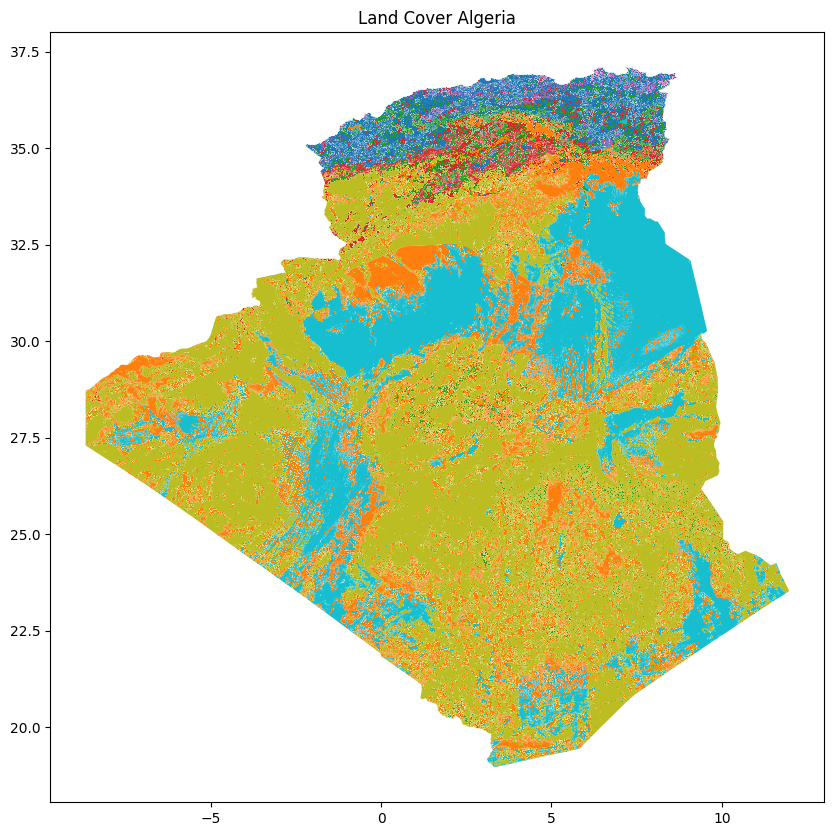

In [11]:
landcover_dz_filepath = os.path.join(data_folder, data_files["landcover_dz"])

# Read the shapefile into a GeoDataFrame
landcover_dz_gdf = geopandas.read_file(landcover_dz_filepath)

print(landcover_dz_gdf.info())

print(landcover_dz_gdf.head())
import matplotlib.pyplot as plt
landcover_dz_gdf.plot(column='LCCCODE', legend=False, figsize=(10, 10))
plt.title('Land Cover Algeria')

plt.show()

### For Tunisia

Width: 45373
Height: 81474
CRS: EPSG:4326
Bounds: BoundingBox(left=7.5224, bottom=30.24053, right=11.59833, top=37.55946)
nombre de classes: 13


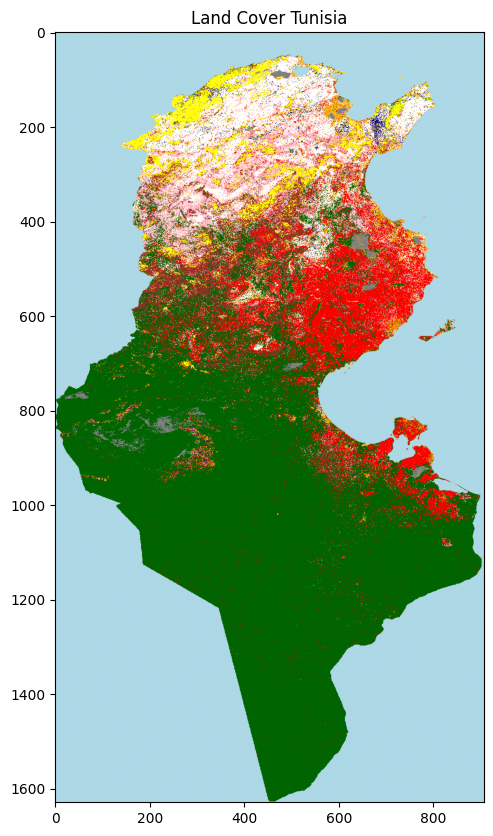

In [ ]:
#land cover Tunisia
import rasterio
from rasterio.windows import Window
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.colors import ListedColormap,BoundaryNorm
# Path to your file
landcover_tn_filepath = os.path.join(data_folder, data_files["landcover_tn"])

colors = [
    "lightblue", "green", "darkgreen", "yellow", "orange", "brown",
    "red", "pink", "purple", "grey", "darkblue", "beige", "white"
]

cmap = ListedColormap(colors)
with rasterio.open(landcover_tn_filepath) as src:
    print("Width:", src.width)
    print("Height:", src.height)
    print("CRS:", src.crs)
    print("Bounds:", src.bounds)
    
        # Lire les données
    data = src.read(1,out_shape=(int(src.height/50), int(src.width/50)))  
     # Masquer les valeurs nulles si besoin
    
    data = np.ma.masked_where(data == 0, data)
    
    # Trouver les valeurs uniques (classes)
    classes = np.unique(data)
    print("nombre de classes:", len(classes))
    norm = BoundaryNorm(boundaries=np.append(classes, classes[-1]+1), ncolors=len(classes))

    # plot Tunisia land cover
    plt.figure(figsize=(10, 10))
    plt.imshow(data, cmap=cmap,norm=norm)  # tu peux changer la colormap
    plt.title("Land Cover Tunisia")
    plt.show()




### Climate Dataset

##### Reading one instance

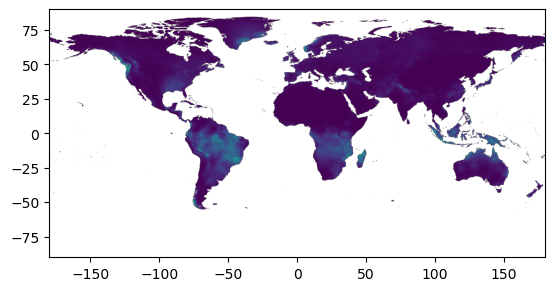

(1, 2160, 4320)


In [62]:
file = os.path.join(data_folder, data_files["climate_prec"], "wc2.1_cruts4.09_5m_prec_2020-01.tif")
src = rasterio.open(file)
show(src)

# Checking the number of bands
array = src.read()
print(array.shape)

##### Loading and merging the boundaries of Algeria and Tunisia

In [4]:
def load_dz_tn_boundaries(dz_shapefile_path, tn_shapefile_path):
    dz = geopandas.read_file(dz_shapefile_path)
    tn = geopandas.read_file(tn_shapefile_path)

    # Ensure both shapefiles use the same CRS 
    if dz.crs != tn.crs:
        tn = tn.to_crs(dz.crs)

    # Concatenate the GeoDataFrames
    boundaries = geopandas.GeoDataFrame(pd.concat([dz, tn], ignore_index=True), crs=dz.crs)

    return boundaries

# Shapefile downloaded from https://gadm.org/

In [5]:
dz_boundaries_filepath = os.path.join(data_folder, data_files["dz_boundaries"])
tn_boundaries_filepath = os.path.join(data_folder, data_files["tn_boundaries"])

boundaries = load_dz_tn_boundaries(dz_boundaries_filepath, tn_boundaries_filepath)

##### Clipping one worldwide raster instance to the ROI

In [9]:
def clip_instance(file, boundaries=boundaries):
    with rasterio.open(file) as src:
        # Clip raster with shapefile
        out_image, out_transform = mask(src, boundaries.geometry, crop=True)
        out_meta = src.meta.copy()
    
    # Update metadata
    out_meta.update({
        "driver": "GTiff",
        "height": out_image.shape[1],
        "width": out_image.shape[2],
        "transform": out_transform
    })

    return out_image, out_meta

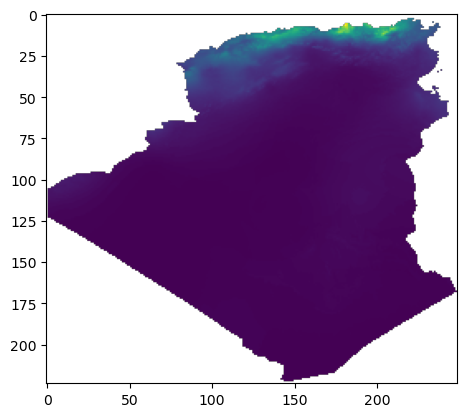

<Axes: >

In [ ]:
# PoC
show(clip_instance(file)[0])

In [ ]:
output_base = os.path.join(output_folder, output_folders["climate"])

for var in ["climate_prec", "climate_tmax", "climate_tmin"]:
    climate_folder = os.path.join(data_folder, data_files[var])

    for filename in os.listdir(climate_folder):
        if filename.endswith(".tif") and "2024" in filename:
            filepath = os.path.join(climate_folder, filename)
            try:
                # Clip raster
                clipped_image, clipped_meta = clip_instance(filepath, boundaries)

                # Save output
                save_path = os.path.join(output_base, var.split("_")[1])  # prec | tmax | tmin
                os.makedirs(save_path, exist_ok=True)

                output_filename = f"clipped_{filename}"
                output_filepath = os.path.join(save_path, output_filename)

                with rasterio.open(output_filepath, "w", **clipped_meta) as dest:
                    dest.write(clipped_image)

                print(f"Saved clipped raster to: {output_filepath}")

            except Exception as e:
                print(f"Error processing {filename}: {e}")

Processing wc2.1_cruts4.09_5m_prec_2024-05.tif...
Saved clipped raster to: ./project/processed_data/climate_dataset/prec/clipped_wc2.1_cruts4.09_5m_prec_2024-05.tif
Processing wc2.1_cruts4.09_5m_prec_2024-04.tif...
Saved clipped raster to: ./project/processed_data/climate_dataset/prec/clipped_wc2.1_cruts4.09_5m_prec_2024-04.tif
Processing wc2.1_cruts4.09_5m_prec_2024-01.tif...
Saved clipped raster to: ./project/processed_data/climate_dataset/prec/clipped_wc2.1_cruts4.09_5m_prec_2024-01.tif
Processing wc2.1_cruts4.09_5m_prec_2024-03.tif...
Saved clipped raster to: ./project/processed_data/climate_dataset/prec/clipped_wc2.1_cruts4.09_5m_prec_2024-03.tif
Processing wc2.1_cruts4.09_5m_prec_2024-07.tif...
Saved clipped raster to: ./project/processed_data/climate_dataset/prec/clipped_wc2.1_cruts4.09_5m_prec_2024-07.tif
Processing wc2.1_cruts4.09_5m_prec_2024-09.tif...
Saved clipped raster to: ./project/processed_data/climate_dataset/prec/clipped_wc2.1_cruts4.09_5m_prec_2024-09.tif
Processing

### Elevation Dataset

In [ ]:
grid_path = os.path.join(data_folder, data_files["elevation"])  
with rasterio.open(grid_path) as src:
    print(src.driver)    
    print(src.width, src.height, src.shape)
    print(src.crs)
    print(src.bounds)
    arr = src.read(1) 
    print(arr.shape)

AIG
86400 33600 (33600, 86400)
EPSG:4326
BoundingBox(left=-180.00013888888893, bottom=-56.00013888888891, right=179.99986111111085, top=83.999861111111)
(33600, 86400)


In [10]:
img_elevation, meta_elevation = clip_instance(grid_path)

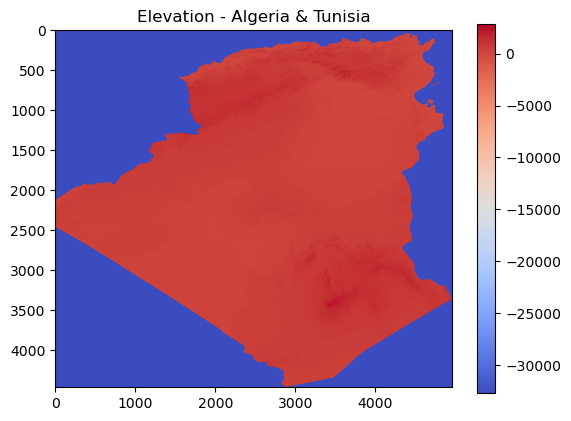

In [15]:
plt.imshow(img_elevation[0], cmap='coolwarm')
plt.title("Elevation - Algeria & Tunisia")
plt.colorbar()
plt.show()

In [18]:
output_base = os.path.join(output_folder, output_folders["elevation"])
os.makedirs(output_base, exist_ok=True)
output_filepath = os.path.join(output_base, "Elevation_DZ_TN.tif")
with rasterio.open(output_filepath, "w", **meta_elevation) as dest:
    dest.write(img_elevation)

print(f"Saved clipped raster to: {output_filepath}")

Saved clipped raster to: ./processed_data/elevation_dataset/Elevation_DZ_TN.tif


### Soil Dataset

In [16]:
soil_filepath = os.path.join(data_folder, data_files["soil"])

In [ ]:
img, meta = clip_instance(soil_filepath)

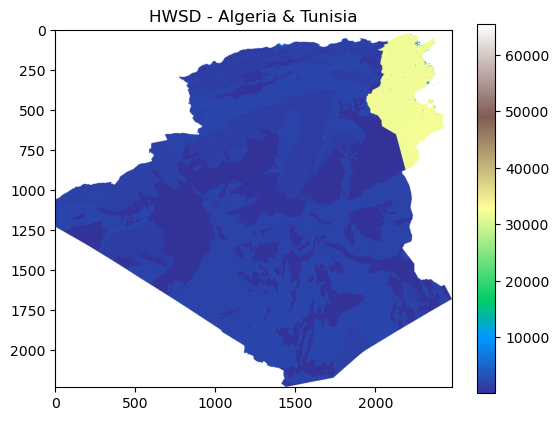

In [18]:
plt.imshow(img[0], cmap='terrain')
plt.title("HWSD - Algeria & Tunisia")
plt.colorbar()
plt.show()

In [22]:
output_base = os.path.join(output_folder, output_folders["soil"])
os.makedirs(output_base, exist_ok=True)
output_filepath = os.path.join(output_base, "HWSD_DZ_TN.tif")
with rasterio.open(output_filepath, "w", **meta) as dest:
    dest.write(img)

print(f"Saved clipped raster to: {output_filepath}")

Saved clipped raster to: ./project/processed_data/soil_dataset/HWSD_DZ_TN.tif
